### Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()


#### Reading the Data using pandas

In [150]:
# Read the CSV file "GOOGLE csv" into a DataFrame
data = pd.read_csv("GOOGLE csv")

# Display the first few rows of the DataFrame
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


#### Splitting the dataset into train and test

In [151]:
# Splitting the data into train and test sets based on the 'Date' column
train_data = data[data['Date'] < '2019-01-01'].copy()
test_data = data[data['Date'] >= '2019-01-01'].copy()


In [145]:
# Remove unnecessary columns from the data
train_data = data.drop(['Date', 'Adj Close'], axis=1)
train_data


,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
3804,1220.969971,1226.000000,1212.300049,1219.000000,1404100
3805,1219.000000,1231.229980,1203.579956,1205.099976,1273500
3806,1196.979980,1196.979980,1171.290039,1176.630005,1615100
3807,1180.000000,1189.060059,1162.430054,1187.829956,1621200


#### Transforming data points to a similar range

In [114]:
# Focal cell:
train_data = sc.fit_transform(train_data)
train_data


array([[3.29485734e-04, 9.33053728e-04, 0.00000000e+00, 1.32809895e-04,
        5.43577404e-01],
       [7.40330113e-04, 2.95198254e-03, 1.85599897e-03, 3.34030536e-03,
        2.77885613e-01],
       [4.70232083e-03, 4.72156249e-03, 5.35132373e-03, 3.77897219e-03,
        2.22150736e-01],
       ...,
       [9.37105474e-01, 9.25487820e-01, 9.22030811e-01, 9.10362429e-01,
        1.94732812e-02],
       [9.23239627e-01, 9.19093516e-01, 9.14759554e-01, 9.19410981e-01,
        1.95471905e-02],
       [9.32949010e-01, 9.37162354e-01, 9.36704665e-01, 9.36514471e-01,
        1.22761154e-02]])

In [46]:
train_data[0:10]

array([[3.29485734e-04, 9.33053728e-04, 0.00000000e+00, 1.32809895e-04,
        5.43577404e-01],
       [7.40330113e-04, 2.95198254e-03, 1.85599897e-03, 3.34030536e-03,
        2.77885613e-01],
       [4.70232083e-03, 4.72156249e-03, 5.35132373e-03, 3.77897219e-03,
        2.22150736e-01],
       [4.90163894e-03, 3.96546966e-03, 3.11104473e-03, 1.95588943e-03,
        1.85522018e-01],
       [2.34709211e-03, 2.51763138e-03, 3.23777738e-03, 2.41065629e-03,
        1.11762967e-01],
       [2.34302382e-03, 2.49752303e-03, 3.55664800e-03, 3.17932688e-03,
        8.62763771e-02],
       [3.62436593e-03, 2.76698104e-03, 3.97772263e-03, 2.47102171e-03,
        7.55243925e-02],
       [2.47725893e-03, 1.50816657e-03, 2.47330022e-03, 8.04892420e-04,
        6.31682127e-02],
       [1.26506892e-03, 7.92291246e-04, 2.53462427e-03, 9.49774105e-04,
        5.97732318e-02],
       [1.42777886e-03, 4.94680248e-04, 1.51668509e-03, 9.65872519e-05,
        1.11151095e-01]])

### Splitting training data points into X_train , Y_train.

In [8]:
# Focal cell:
# Define empty lists for training data
X_train = []
Y_train = []


In [9]:
# Focal cell: Extracting sequences and labels from training data
for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])  # Extracting a sequence of length 60
    Y_train.append(train_data[i, 0])      # Adding the corresponding label


In [48]:
# Convert X_train and Y_train to numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Display the shapes of X_train and Y_train
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)


((3749, 60, 5), (3749,))

### LSTM Model training

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Focal cell:
# The code imports necessary modules for creating a neural network using Keras.



In [17]:
regressor = Sequential()


regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 110, activation = 'relu'))
regressor.add(Dropout(0.4))

regressor.add(Dense(1))

In [18]:
# Display a summary of the regressor model
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 70)            33880     
                                                                 
 dropout_1 (Dropout)         (None, 60, 70)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 90)            57960     
                                                                 
 dropout_2 (Dropout)         (None, 60, 90)            0         
                                                                 
 lstm_3 (LSTM)               (None, 110)              

In [19]:
# Compiling the regressor model with the Adam optimizer and mean squared error loss.
regressor.compile(optimizer='Adam', loss='mean_squared_error')


In [106]:

# Fitting the regressor model
regressor.fit(X_train, Y_train, epochs=30, batch_size=32)


Epoch 1/30
118/118 [==============================] - 12s 101ms/step - loss: 0.0023
Epoch 2/30
118/118 [==============================] - 12s 98ms/step - loss: 0.0022
Epoch 3/30
118/118 [==============================] - 13s 112ms/step - loss: 0.0026
Epoch 4/30
118/118 [==============================] - 14s 117ms/step - loss: 0.0023
Epoch 5/30
118/118 [==============================] - 14s 118ms/step - loss: 0.0020
Epoch 6/30
118/118 [==============================] - 15s 126ms/step - loss: 0.0018
Epoch 7/30
118/118 [==============================] - 14s 119ms/step - loss: 0.0019
Epoch 8/30
118/118 [==============================] - 14s 122ms/step - loss: 0.0018
Epoch 9/30
118/118 [==============================] - 16s 134ms/step - loss: 0.0019
Epoch 10/30
118/118 [==============================] - 15s 124ms/step - loss: 0.0017
Epoch 11/30
118/118 [==============================] - 14s 121ms/step - loss: 0.0017
Epoch 12/30
118/118 [==============================] - 16s 132ms/step - los

In [110]:
train_data

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
3804,1220.969971,1226.000000,1212.300049,1219.000000,1404100
3805,1219.000000,1231.229980,1203.579956,1205.099976,1273500
3806,1196.979980,1196.979980,1171.290039,1176.630005,1615100
3807,1180.000000,1189.060059,1162.430054,1187.829956,1621200


### Preparing test data

In [143]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [147]:
# Selecting the last 60 days of train data
past_60_days = train_data.tail(60)
past_60_days


,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [148]:
# Combine past_60_days and test_data into a single DataFrame
df = past_60_days.append(test_data, ignore_index=True)

# Drop the 'Date' and 'Adj Close' columns from the DataFrame
df = df.drop(['Date', 'Adj Close'], axis=1)

# Display the first few rows of the DataFrame
df.head()


C:\Users\harsh vardhan mishra\AppData\Local\Temp\ipykernel_14108\410450255.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(test_data, ignore_index = True)


,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [115]:
# Assuming 'sc' is a defined StandardScaler object and 'df' is the DataFrame to be transformed

# Transform the data in 'df' using the StandardScaler object 'sc'
inputs = sc.transform(df)

# Display the transformed data
inputs


array([[0.89383386, 0.88540998, 0.89535033, 0.88472746, 0.01037275],
       [0.8961775 , 0.88821961, 0.89585915, 0.88912244, 0.01085497],
       [0.89547524, 0.8944848 , 0.90045497, 0.89174006, 0.01491393],
       ...,
       [0.93710547, 0.92548782, 0.92203081, 0.91036243, 0.01947328],
       [0.92323963, 0.91909352, 0.91475955, 0.91941098, 0.01954719],
       [0.93294901, 0.93716235, 0.93670466, 0.93651447, 0.01227612]])

In [116]:
# Focal cell:
X_test = []
Y_test = []

# Loop through the range of indices starting from 60
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i - 60:i])  # Append a sequence of previous 60 inputs to X_test
    Y_test.append(inputs[i, 0])  # Append the target value from inputs to Y_test


In [117]:
# Displaying the shapes of X_test and Y_test arrays
np.shape(X_test), np.shape(Y_test)

((192, 60, 5), (192,))

In [118]:
# Convert X_test and Y_test to numpy arrays for consistent data type
X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [119]:
# Predict using the regressor model on the test data
y_pred = regressor.predict(X_test)


6/6 [==============================] - 0s 42ms/step


In [139]:
# Convert predictions and test data to numpy arrays
y_pred, Y_test = np.array(y_pred), np.array(Y_test)


In [121]:
sc.scale_

array([8.16599709e-04, 8.07369682e-04, 8.20685063e-04, 8.07909963e-04,
       1.21162775e-08])

In [152]:
scale = 1/8.16599709e-04 # Define the scale factor
print(scale)

1224.5901988191868


In [153]:
# Scaling the y_pred and Y_test arrays
y_pred = y_pred * scale
Y_test = Y_test * scale


In [154]:
y_pred, Y_test

(array([[5.1507371e+27],
        [5.1301824e+27],
        [5.0965627e+27],
        [5.0519458e+27],
        [5.0006307e+27],
        [4.9466807e+27],
        [4.8936075e+27],
        [4.8435569e+27],
        [4.7975466e+27],
        [4.7554098e+27],
        [4.7178430e+27],
        [4.6865568e+27],
        [4.6623334e+27],
        [4.6458075e+27],
        [4.6352146e+27],
        [4.6285050e+27],
        [4.6238018e+27],
        [4.6209209e+27],
        [4.6187964e+27],
        [4.6162345e+27],
        [4.6133946e+27],
        [4.6124977e+27],
        [4.6151006e+27],
        [4.6217143e+27],
        [4.6324237e+27],
        [4.6466076e+27],
        [4.6609202e+27],
        [4.6728283e+27],
        [4.6815278e+27],
        [4.6880650e+27],
        [4.6942837e+27],
        [4.7009019e+27],
        [4.7080438e+27],
        [4.7151637e+27],
        [4.7218455e+27],
        [4.7268884e+27],
        [4.7299273e+27],
        [4.7315175e+27],
        [4.7320636e+27],
        [4.7321179e+27],


## Visualizing Original Stock Price and Predicted Stock price

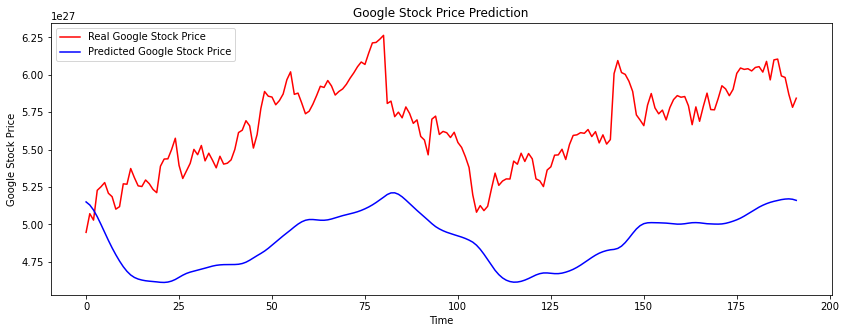

In [155]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()